In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xrft

Import data

In [2]:
user = os.getcwd().split('/')[2]

if user=='pst019':
    Mediadir= '/media/'+user+'/Backup1/'
 
datadir = Mediadir + 'data/ERA5_Clim/ERA5_data/'
year= 2013
month= 3

filedir= datadir + f'levels_500_era5_{year}_'+str(month).zfill(2)+'.nc'

ds= xr.open_dataset(filedir)
ds['plev']= ds['plev']/100

var= 'v'
plev= 500

ds= ds[var].sel(plev= plev)

# Monthly mean = stationary

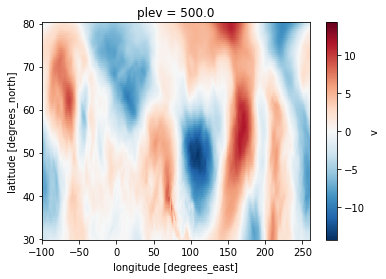

In [3]:
ds1= ds.mean(dim='time')
ds1.plot()

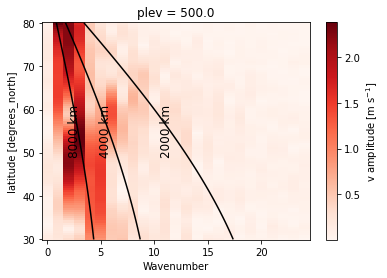

In [4]:
fds1 = xrft.fft(ds1, dim='lon', true_phase=True, true_amplitude=True)
fds1= np.abs(fds1)

n= len(fds1.freq_lon)
fds1['freq_lon'] = 360* fds1['freq_lon']

fds1= fds1.isel(freq_lon= np.arange(n//2, n) ).rename({'freq_lon': 'Wavenumber'}).rename('v amplitude [m s$^{-1}$]') #to cut the spectrum in 2
fds1*= 2/n

#fds1['Wavenumber']= fds1['Wavenumber'] -0.5

fds1[:, :25].plot(cmap= 'Reds')

###make the lines with the wavelength
a= 6371E3
LatCirc = 2* np.pi * a * np.cos(np.deg2rad(fds1.lat))
Splitlist= [8000E3, 4000E3, 2000E3]

for Split in Splitlist:
    WaveSplit= LatCirc/Split
    plt.plot(WaveSplit, WaveSplit.lat, c= 'k')
    plt.text(WaveSplit[len(WaveSplit)//2].values-.3, WaveSplit.lat[len(WaveSplit)//2], str(int(Split/1E3)) +' km',
                 fontsize=12, rotation='vertical', ha='center', va= 'center')        

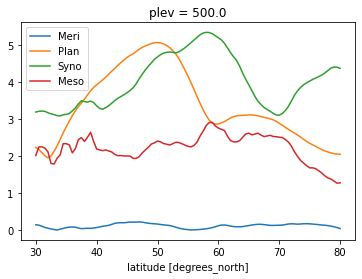

In [5]:
fds1['Wavenumber']= fds1.Wavenumber.astype('int')

Split1, Split2= 8E6, 2E6
WaveSplit1= LatCirc/Split1
WaveSplit2= LatCirc/Split2

Meri= fds1.sel(Wavenumber= 0)
Plan= (fds1.where(np.logical_and(fds1.Wavenumber > 0, fds1.Wavenumber < 1+ WaveSplit1//1)).sum(dim='Wavenumber')
                +  WaveSplit1%1 * fds1.sel(Wavenumber= 1+ WaveSplit1//1).fillna(0) )
Syno= ( fds1.where(np.logical_and(fds1.Wavenumber > 1+ WaveSplit1//1, fds1.Wavenumber < 1+ WaveSplit2//1)).sum(dim='Wavenumber') 
              + (1- WaveSplit1%1) * fds1.sel(Wavenumber= 1+ WaveSplit1//1).fillna(0) 
              + WaveSplit2%1 * fds1.sel(Wavenumber= 1+ WaveSplit2//1).fillna(0) )
Meso= ( fds1.where(fds1.Wavenumber > 1+ WaveSplit2//1).sum(dim='Wavenumber') 
              +(1- WaveSplit2%1) * fds1.sel(Wavenumber= 1+ WaveSplit2//1).fillna(0) )



Meri.plot(label='Meri')
Plan.plot(label= 'Plan')
Syno.plot(label= 'Syno')
Meso.plot(label= 'Meso')
plt.legend()

# Mean of amplitudes = Total

In [10]:
fds = xrft.fft(ds, dim='lon', true_phase=True, true_amplitude=True)
fds= np.abs(fds)

n= len(fds.freq_lon)
fds['freq_lon'] = 360* fds['freq_lon']

fds= fds.isel(freq_lon= np.arange(n//2, n) ).rename({'freq_lon': 'Wavenumber'}).rename('v amplitude [m s$^{-1}$]') #to cut the spectrum in 2
fds*= 2/n

#fds['Wavenumber']= fds['Wavenumber'] -0.5

TypeError: pcolormesh() takes 1 or 3 positional arguments but 2 were given

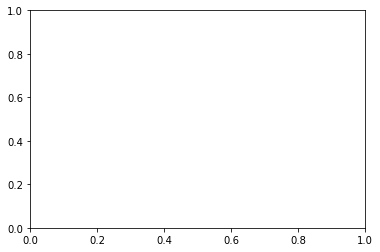

In [11]:
fds= fds.mean(dim= 'time')
#fds[:,:25].plot(cmap= 'Reds')
plt.pcolormesh(fds.values, x= fds['Wavenumber'] -0.5, y)

###make the lines with the wavelength
a= 6371E3
LatCirc = 2* np.pi * a * np.cos(np.deg2rad(fds1.lat))
Splitlist= [8000E3, 4000E3, 2000E3]

for Split in Splitlist:
    WaveSplit= LatCirc/Split   
    plt.plot(WaveSplit, WaveSplit.lat, c= 'k')
    plt.text(WaveSplit[len(WaveSplit)//2].values-.3, WaveSplit.lat[len(WaveSplit)//2], str(int(Split/1E3)) +' km',
                 fontsize=12, rotation='vertical', ha='center', va= 'center')  

In [12]:
fds.values

array([[1.93511040e-01, 3.52609675e+00, 4.63341461e+00, ...,
        1.90110474e-05, 1.92825000e-05, 1.90112335e-05],
       [1.95045878e-01, 3.36006082e+00, 4.57081797e+00, ...,
        1.85815512e-05, 1.86433189e-05, 1.85064213e-05],
       [2.01674605e-01, 3.21670606e+00, 4.50209930e+00, ...,
        1.90426968e-05, 1.85967133e-05, 1.87343671e-05],
       ...,
       [2.46955165e-01, 3.99065115e-01, 7.67365496e-01, ...,
        1.78714692e-05, 1.86519788e-05, 1.78261700e-05],
       [2.59437860e-01, 3.99339464e-01, 7.55779073e-01, ...,
        1.89631064e-05, 1.86777781e-05, 1.81560629e-05],
       [2.74502198e-01, 3.84093393e-01, 7.45094324e-01, ...,
        1.86822002e-05, 1.86055751e-05, 1.83245504e-05]])

In [8]:
fds['Wavenumber']= fds.Wavenumber.astype('int')

Split1, Split2= 8E6, 2E6
WaveSplit1= LatCirc/Split1
WaveSplit2= LatCirc/Split2

Meri= fds.sel(Wavenumber= 0)
Plan= (fds.where(np.logical_and(fds.Wavenumber > 0, fds.Wavenumber < 1+ WaveSplit1//1)).sum(dim='Wavenumber')
                +  WaveSplit1%1 * fds.sel(Wavenumber= 1+ WaveSplit1//1).fillna(0) )
Syno= ( fds.where(np.logical_and(fds.Wavenumber > 1+ WaveSplit1//1, fds.Wavenumber < 1+ WaveSplit2//1)).sum(dim='Wavenumber') 
              + (1- WaveSplit1%1) * fds.sel(Wavenumber= 1+ WaveSplit1//1).fillna(0) 
              + WaveSplit2%1 * fds.sel(Wavenumber= 1+ WaveSplit2//1).fillna(0) )
Meso= ( fds.where(fds.Wavenumber > 1+ WaveSplit2//1).sum(dim='Wavenumber') 
              +(1- WaveSplit2%1) * fds.sel(Wavenumber= 1+ WaveSplit2//1).fillna(0) )



Meri.plot(label='Meri')
Plan.plot(label= 'Plan')
Syno.plot(label= 'Syno')
Meso.plot(label= 'Meso')
plt.legend()

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

# Transient = Total - Stationary

In [ ]:
(fds[:,:25]- fds1[:, :25]).plot(cmap= 'Reds')

###make the lines with the wavelength
a= 6371E3
LatCirc = 2* np.pi * a * np.cos(np.deg2rad(fds1.lat))
Splitlist= [8000E3, 4000E3, 2000E3]

for Split in Splitlist:
    WaveSplit= LatCirc/Split   
    plt.plot(WaveSplit, WaveSplit.lat, c= 'k')
    plt.text(WaveSplit[len(WaveSplit)//2].values-.3, WaveSplit.lat[len(WaveSplit)//2], str(int(Split/1E3)) +' km',
                 fontsize=12, rotation='vertical', ha='center', va= 'center')  

# All plots compared

In [ ]:
fds[:,:25].plot(cmap= 'Reds', vmax= 5)
plt.title('Total')
plt.show()
fds1[:, :25].plot(cmap= 'Reds', vmax= 5)
plt.title('Stationary')
plt.show()
(fds[:,:25]- fds1[:, :25]).plot(cmap= 'Reds', vmax= 5)
plt.title('Transient')
plt.show()